## Сначала посмотрим на данные

In [1]:
import numpy as np
import pandas as pd
import scipy 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

сразу видим категориальные переменные и пропуски.

In [4]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
 for i in df.columns:
        if df[i].isna().sum() != 0:
            df[i] = df[i].fillna(value=df[i].median())

In [6]:
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2938.0,6.923472e+01,9.509115e+00,36.30000,63.200000,7.210000e+01,7.560000e+01,8.900000e+01
Adult Mortality,2938.0,1.647257e+02,1.240862e+02,1.00000,74.000000,1.440000e+02,2.270000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2938.0,4.546875e+00,3.921946e+00,0.01000,1.092500,3.755000e+00,7.390000e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2938.0,8.302212e+01,2.299698e+01,1.00000,82.000000,9.200000e+01,9.600000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2938.0,3.838118e+01,1.993537e+01,1.00000,19.400000,4.350000e+01,5.610000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [8]:
numerical = ['Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']
catigorial = ['Country','Status']

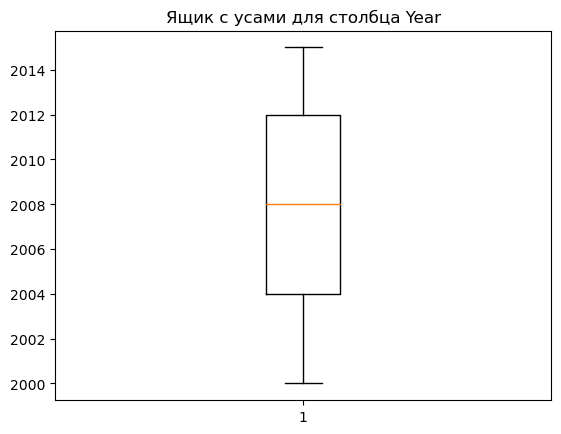

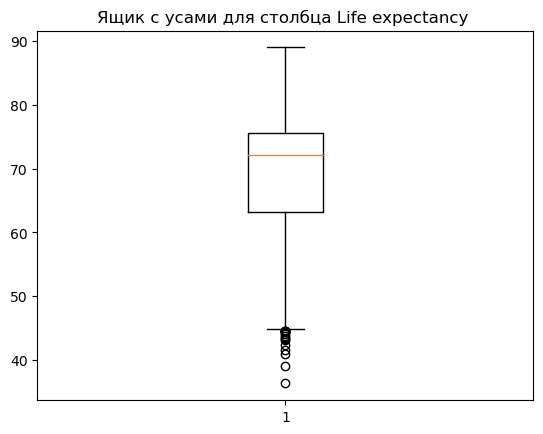

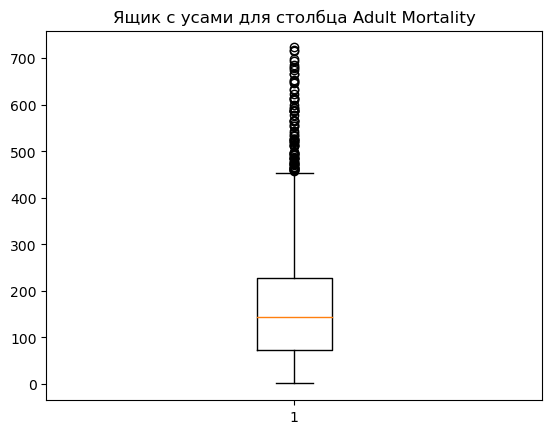

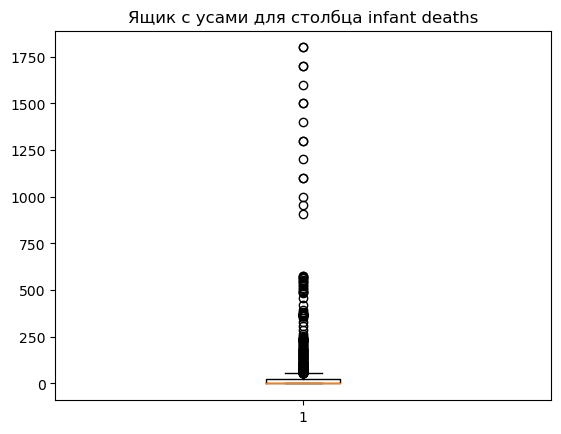

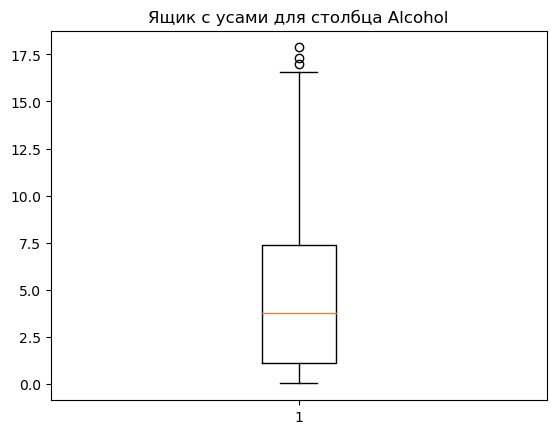

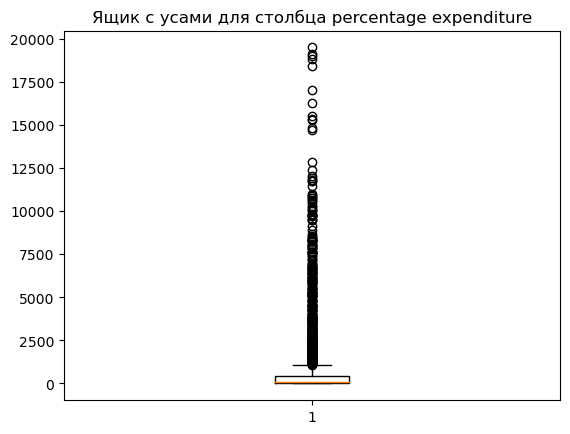

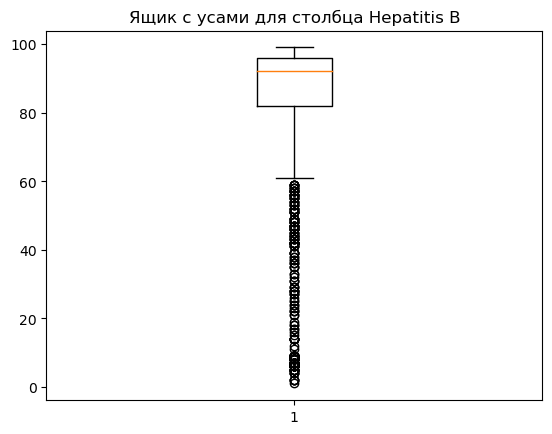

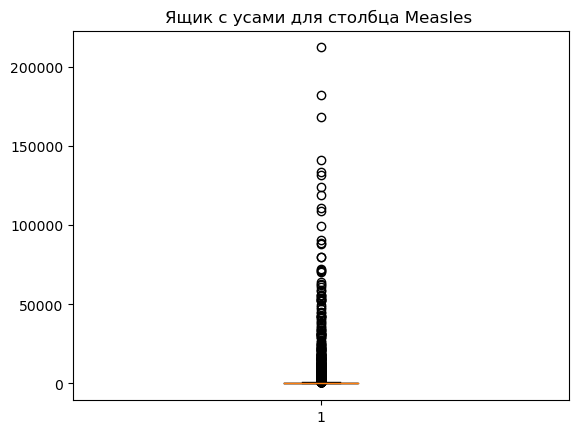

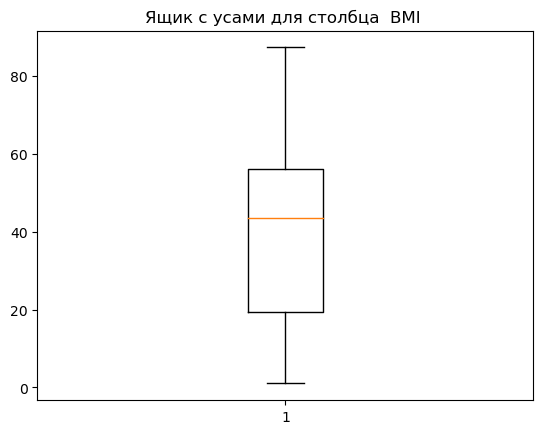

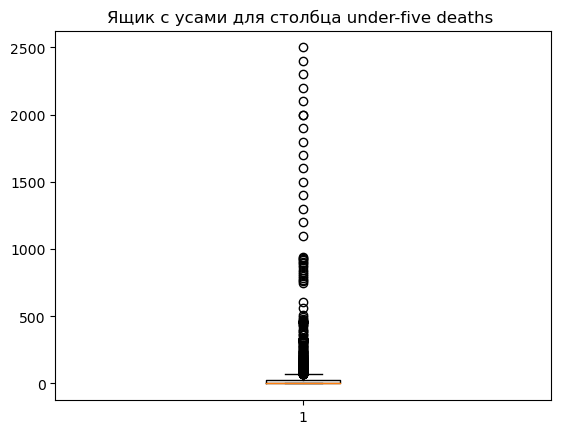

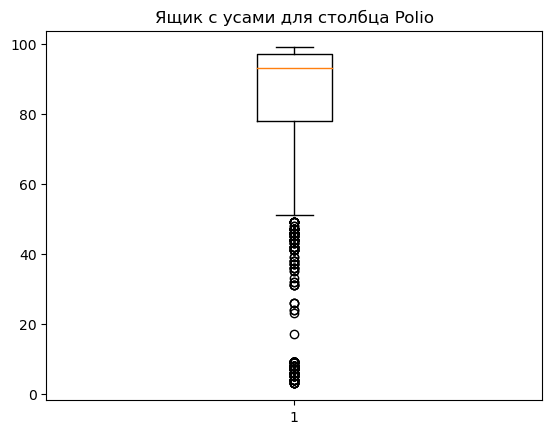

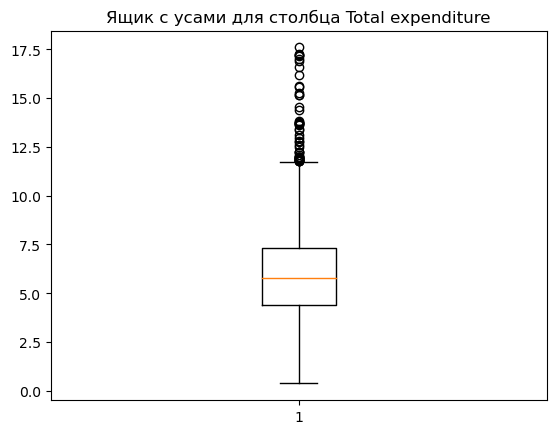

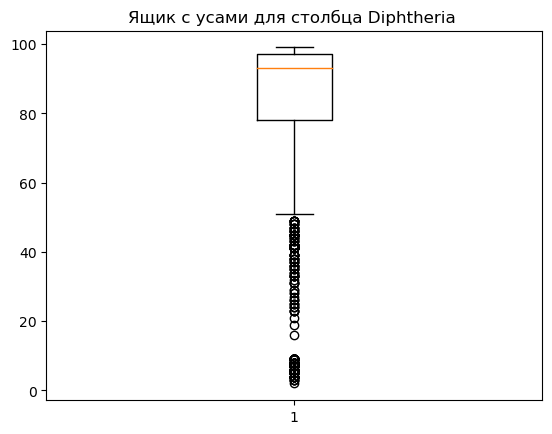

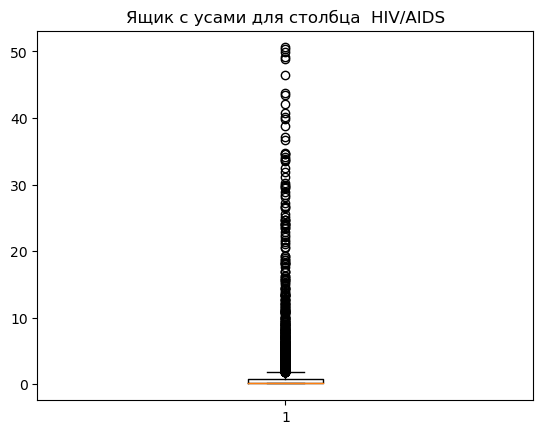

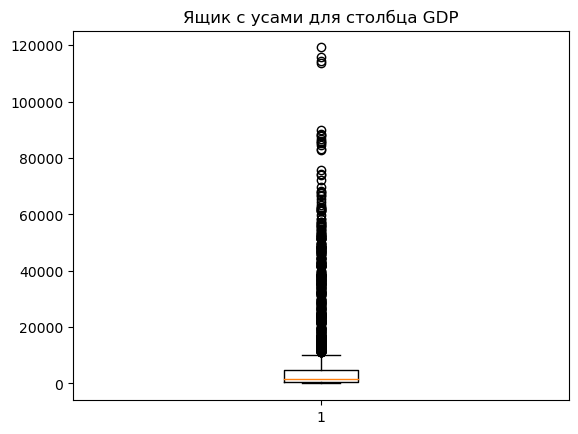

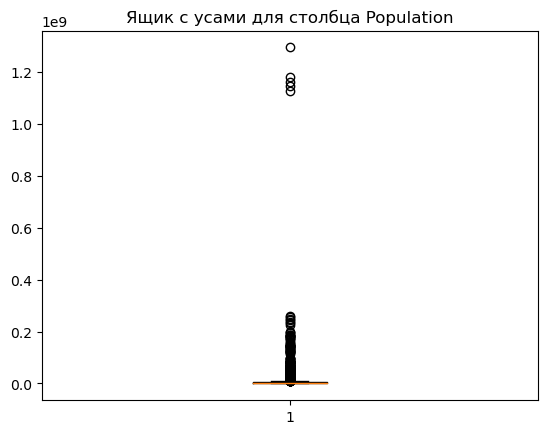

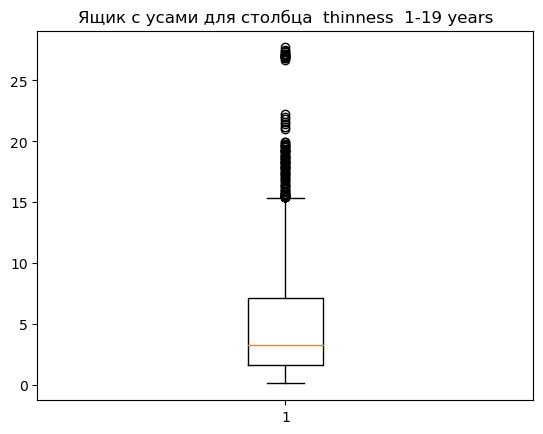

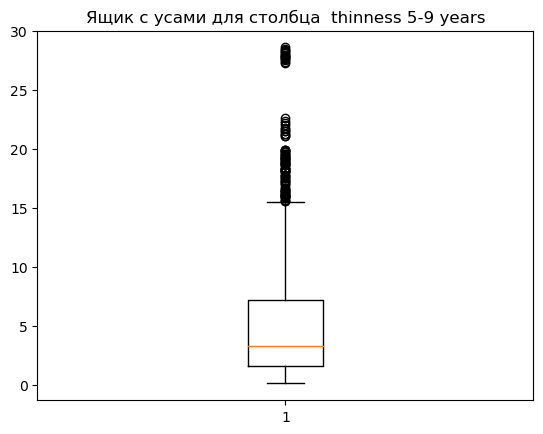

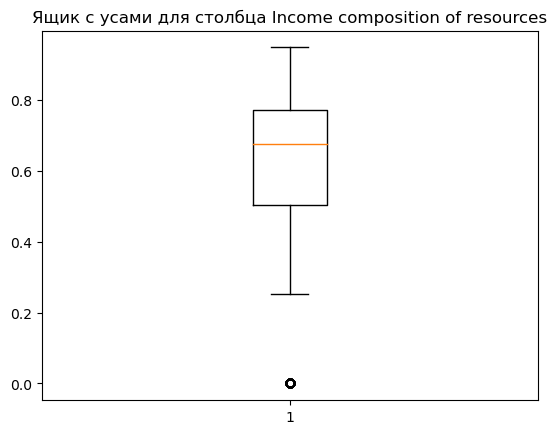

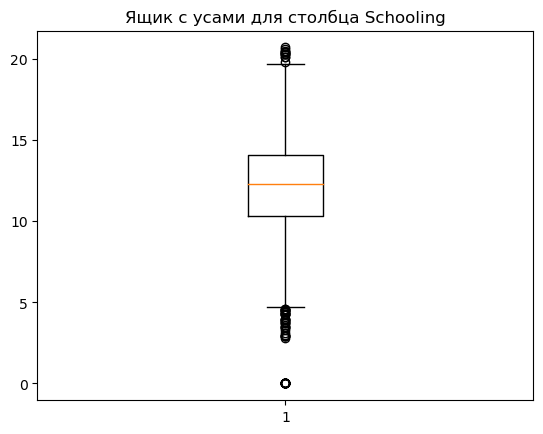

In [9]:
for i in df[numerical].columns:
    plt.boxplot(df[i]) #строим боксплоты
    plt.title(f'Ящик с усами для столбца {i}')
    plt.show()

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [11]:
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum() / len(df)

C:\Users\HP\AppData\Local\Temp\ipykernel_5556\1916069659.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum() / len(df)


 BMI                               0.000000
 HIV/AIDS                          0.184479
 thinness  1-19 years              0.034037
 thinness 5-9 years                0.033696
Adult Mortality                    0.029272
Alcohol                            0.001021
Country                            0.000000
Diphtheria                         0.101430
GDP                                0.151464
Hepatitis B                        0.109598
Income composition of resources    0.044248
Life expectancy                    0.005786
Measles                            0.184479
Polio                              0.094963
Population                         0.153846
Schooling                          0.026208
Status                             0.000000
Total expenditure                  0.017359
Year                               0.000000
infant deaths                      0.107216
percentage expenditure             0.132403
under-five deaths                  0.134105
dtype: float64

Выбросов очень много, поэтому мы не будем их чистить, чтобы не потерять кучу данных.

### Корреляция

In [12]:
corr = df[numerical].corr()
corr

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170819,-0.079535,-0.037415,-0.069147,0.031400,0.021302,-0.082493,0.108484,-0.042937,0.091388,0.074552,0.131373,-0.139741,0.091480,0.014027,-0.047827,-0.050859,0.236594,0.203517
Life expectancy,0.170819,1.000000,-0.696390,-0.196769,0.388918,0.381418,0.170219,-0.157767,0.556901,-0.222738,0.458399,0.208844,0.472211,-0.556703,0.430461,-0.029014,-0.468002,-0.462473,0.688662,0.713054
Adult Mortality,-0.079535,-0.696390,1.000000,0.078890,-0.190191,-0.242628,-0.123287,0.031293,-0.379092,0.094280,-0.270002,-0.111796,-0.270301,0.523886,-0.281434,-0.005292,0.296135,0.301634,-0.436332,-0.433415
infant deaths,-0.037415,-0.196769,0.078890,1.000000,-0.112918,-0.085612,-0.167421,0.501128,-0.226796,0.996629,-0.170896,-0.126268,-0.175376,0.025231,-0.102829,0.551667,0.464811,0.470445,-0.141571,-0.190951
Alcohol,-0.069147,0.388918,-0.190191,-0.112918,1.000000,0.344410,0.090850,-0.049752,0.313022,-0.109790,0.211744,0.296153,0.212388,-0.046235,0.313060,-0.026836,-0.413021,-0.402034,0.418372,0.498899
percentage expenditure,0.031400,0.381418,-0.242628,-0.085612,0.344410,1.000000,0.039528,-0.056596,0.227408,-0.087852,0.146148,0.175559,0.142506,-0.097857,0.901819,-0.016888,-0.249610,-0.251144,0.374730,0.386076
Hepatitis B,0.021302,0.170219,-0.123287,-0.167421,0.090850,0.039528,1.000000,-0.073021,0.112441,-0.170549,0.364890,0.055988,0.449151,-0.085497,0.076660,-0.125006,-0.097576,-0.100576,0.117652,0.141275
Measles,-0.082493,-0.157767,0.031293,0.501128,-0.049752,-0.056596,-0.073021,1.000000,-0.176069,0.507809,-0.136669,-0.104133,-0.142385,0.030899,-0.069253,0.237188,0.224870,0.221138,-0.111089,-0.120799
BMI,0.108484,0.556901,-0.379092,-0.226796,0.313022,0.227408,0.112441,-0.176069,1.000000,-0.237048,0.281260,0.230745,0.280267,-0.243383,0.273932,-0.069667,-0.532487,-0.539365,0.471947,0.499806
under-five deaths,-0.042937,-0.222738,0.094280,0.996629,-0.109790,-0.087852,-0.170549,0.507809,-0.237048,1.000000,-0.188864,-0.127960,-0.195808,0.038062,-0.106093,0.539260,0.466697,0.471167,-0.159264,-0.206242


<AxesSubplot:>

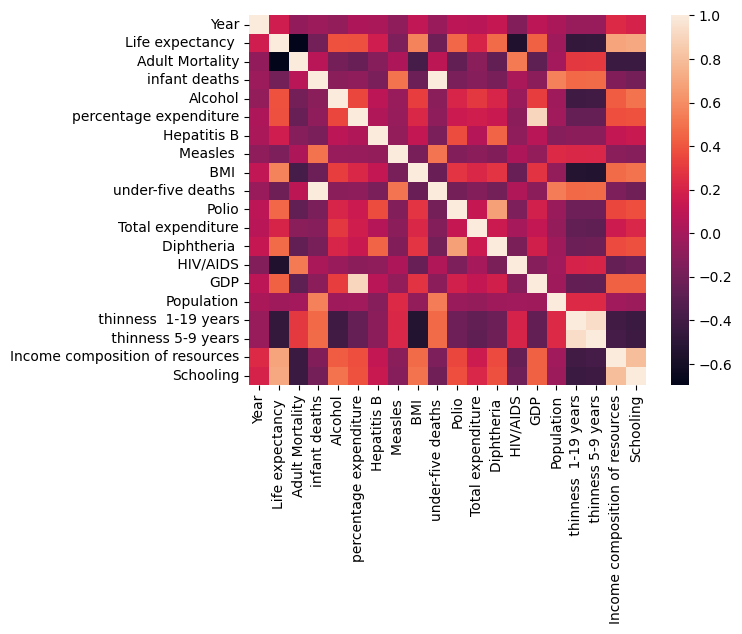

In [13]:
sns.heatmap(corr)

In [14]:
df_1 = df[['Life expectancy ','Adult Mortality', ' BMI ', ' HIV/AIDS', 'Schooling']]
df_1

,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Schooling
0,65.0,263.0,19.1,0.1,10.1
1,59.9,271.0,18.6,0.1,10.0
2,59.9,268.0,18.1,0.1,9.9
3,59.5,272.0,17.6,0.1,9.8
4,59.2,275.0,17.2,0.1,9.5
...,...,...,...,...,...
2933,44.3,723.0,27.1,33.6,9.2
2934,44.5,715.0,26.7,36.7,9.5
2935,44.8,73.0,26.3,39.8,10.0
2936,45.3,686.0,25.9,42.1,9.8


In [15]:
corr_1 = df_1.corr()
corr_1

,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Schooling
Life expectancy,1.000000,-0.696390,0.556901,-0.556703,0.713054
Adult Mortality,-0.696390,1.000000,-0.379092,0.523886,-0.433415
BMI,0.556901,-0.379092,1.000000,-0.243383,0.499806
HIV/AIDS,-0.556703,0.523886,-0.243383,1.000000,-0.218822
Schooling,0.713054,-0.433415,0.499806,-0.218822,1.000000


<AxesSubplot:>

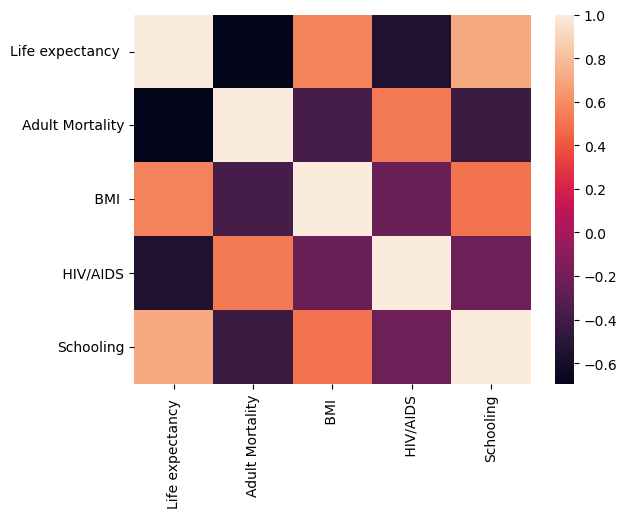

In [16]:
sns.heatmap(corr_1)

# Линейная регрессия

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

In [18]:
X = df_1.drop(['Life expectancy '], axis=1)
y = df_1[['Life expectancy ']]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [20]:
model = LinearRegression()
model.fit(train_X, train_y)
predictions = model.predict(test_X)
r2_lr = model.score(train_X, train_y)
print(f"R2 на train: {model.score(train_X, train_y)}")
print(f"R2 на test: {model.score(test_X, test_y)}")

R2 на train: 0.7629104241013813
R2 на test: 0.7620436644579601


In [21]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
mse_lr = mean_squared_error(test_y, predictions)
rmse_lr = mean_squared_error(test_y, predictions, squared=False)
mape_lr = mean_absolute_percentage_error(test_y, predictions)
print("Среднеквадратическая ошибка (MSE):", mse_lr)
print("Среднеквадратическая ошибка (RMSE):", rmse_lr)
print("Средняя абсолютная ошибка  (MAPE):", round(mape_lr * 100, 2), '%')

Среднеквадратическая ошибка (MSE): 21.872789666918514
Среднеквадратическая ошибка (RMSE): 4.676835432952341
Средняя абсолютная ошибка  (MAPE): 5.2 %


Итого, построив обычную множественную регрессию, уже получилось добиться неплохого коэффициента детерминации. Но стоит попробовать как-то иначе отобрать факторы и/или применить другие методы, чтобы улучшить качество модели.

## Попробуем PCA

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

In [23]:
X = df.drop(['Life expectancy '], axis=1)
y = df[['Life expectancy ']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train[catigorial])

features_name = enc.get_feature_names_out(catigorial)
X_train[features_name] =  enc.transform(X_train[catigorial]).toarray()
X_train = X_train.drop(catigorial, axis=1)

X_test[features_name] = enc.transform(X_test[catigorial]).toarray()
X_test = X_test.drop(catigorial, axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_5556\2013532629.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[features_name] =  enc.transform(X_train[catigorial]).toarray()
C:\Users\HP\AppData\Local\Temp\ipykernel_5556\2013532629.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[features_name] =  enc.transform(X_train[catigorial]).toarray()
C:\Users\HP\AppData\Local\Temp\ipykernel_5556\2013532629.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
pca = PCA(whiten=True)
pca.fit(X_train)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([0.034505  , 0.05152801, 0.06362822, 0.07398023, 0.08373399,
       0.09261782, 0.10023823, 0.10772428, 0.11457543, 0.12112007,
       0.12702137, 0.13274902, 0.13838328, 0.14377587, 0.14907975,
       0.15438178, 0.15938484, 0.16430762, 0.16915233, 0.17395216,
       0.17875151, 0.18354841, 0.18834522, 0.19314106, 0.19793672,
       0.20273231, 0.20752776, 0.2123231 , 0.21711844, 0.22191347,
       0.22670828, 0.23150279, 0.23629721, 0.24109078, 0.24588435,
       0.25067792, 0.25547148, 0.26026502, 0.26505854, 0.26985205,
       0.2746455 , 0.27943891, 0.28423226, 0.28902554, 0.29381871,
       0.29861176, 0.30340474, 0.30819769, 0.31299036, 0.31778281,
       0.32257516, 0.32736725, 0.33215907, 0.33695059, 0.34174191,
       0.34653305, 0.35132417, 0.35611529, 0.36090641, 0.36569753,
       0.37048863, 0.37527972, 0.38007076, 0.38486178, 0.38965275,
       0.39444363, 0.39923448, 0.40402526, 0.40881598, 0.41360662,
       0.41839711, 0.42318737, 0.42797759, 0.43276768, 0.43755

In [27]:
pca = PCA(n_components=10, whiten=True)
pca = pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [28]:
model = LinearRegression()
model.fit(X_train_pca, y_train)
predictions = model.predict(X_test_pca)
r2_pca = model.score(X_test_pca, y_test)
print(f"R2 на train: {model.score(X_train_pca, y_train)}")
print(f"R2 на test: {model.score(X_test_pca, y_test)}")

R2 на train: 0.8266506249110565
R2 на test: 0.8373302179065387


In [29]:
mse_pca = mean_squared_error(y_test, predictions)
rmse_pca = mean_squared_error(y_test, predictions, squared=False)
mape_pca = mean_absolute_percentage_error(y_test, predictions)
print("Среднеквадратическая ошибка (MSE):", mse_pca)
print("Среднеквадратическая ошибка (RMSE):", rmse_pca)
print("Средняя абсолютная ошибка  (MAPE):", round(mape_pca * 100, 2), '%')

Среднеквадратическая ошибка (MSE): 14.952499250708733
Среднеквадратическая ошибка (RMSE): 3.866846163310448
Средняя абсолютная ошибка  (MAPE): 4.41 %


PCA показал себя хорошо! количество факторов с изначальных 21 сократили до 10 (что, конечно, больше, чем получилось в первом варианте, но тоже неплохо), а все значения ошибок и R2 улучшились

## Пермутационная важность

In [30]:
import eli5
from eli5.sklearn import PermutationImportance

In [31]:
X = df[numerical].drop(['Life expectancy '], axis=1)
y = df[['Life expectancy ']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
X_train = pd.DataFrame(data=X_train)
X_test = pd.DataFrame(data=X_test)

In [34]:
reg = LinearRegression().fit(X_train, y_train)
predictions = reg.predict(X_test)

In [35]:
perm = PermutationImportance(reg, random_state=42).fit(X_test, y_test)

In [36]:
eli5.show_weights(perm)

Weight,Feature
3.3556 ± 0.1996,x8
3.2994 ± 0.0831,x2
0.1465 ± 0.0182,x1
0.1184 ± 0.0089,x12
0.1177 ± 0.0130,x18
0.0355 ± 0.0106,x17
0.0261 ± 0.0054,x11
0.0183 ± 0.0019,x7
0.0131 ± 0.0019,x9
0.0069 ± 0.0018,x3


In [37]:
X_train = X_train[[8, 2, 1, 12, 18]].copy()
X_test = X_test[[8, 2, 1, 12, 18]].copy()

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2_perm = model.score(X_test, y_test)
print(f"R2 на train: {model.score(X_train, y_train)}")
print(f"R2 на test: {model.score(X_test, y_test)}")

R2 на train: 0.7678663466152116
R2 на test: 0.7621561035467912


In [39]:
mse_perm = mean_squared_error(y_test, predictions)
rmse_perm  = mean_squared_error(y_test, predictions, squared=False)
mape_perm  = mean_absolute_percentage_error(y_test, predictions)
print("Среднеквадратическая ошибка (MSE):", mse_perm)
print("Среднеквадратическая ошибка (RMSE):", rmse_perm)
print("Средняя абсолютная ошибка  (MAPE):", round(mape_perm * 100, 2), '%')

Среднеквадратическая ошибка (MSE): 21.86245433991518
Среднеквадратическая ошибка (RMSE): 4.675730353636229
Средняя абсолютная ошибка  (MAPE): 5.23 %


In [41]:
df_res = pd.DataFrame({'r2': [r2_lr, r2_pca, r2_perm],
                      'mse': [mse_lr, mse_pca, mse_perm],
                      'rmse': [rmse_lr, rmse_pca, rmse_perm],
                      'mape': [mape_lr, mape_pca, mape_perm]},
                     index=['Множественная регрессия','PCA','Пермутационная важность'])
df_res

,r2,mse,rmse,mape
Множественная регрессия,0.762910,21.872790,4.676835,0.051983
PCA,0.837330,14.952499,3.866846,0.044119
Пермутационная важность,0.762156,21.862454,4.675730,0.052257
